<a href="https://colab.research.google.com/github/bl00p1ng/Curso-Probabilidad-Data-Science/blob/main/%5BClase8%5DDistribucion_Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
# Genrador aleatorio de números basado en la distribución binomial
from numpy.random import binomial
# Implementar la función binomial rápidamente
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

## Fórmula implementada manualmente en código:

In [2]:
def func_binomial(k, n, p):
    return factorial(n) / (factorial(k) * factorial(n - k)) * pow(p, k) * pow(1 - p, n - k)

In [3]:
func_binomial(2, 3, 0.5)

0.375

## Usando `binom()` de Scipy.

El **primer parámetro** que recibe `binom()` es el **número de intentos**.

El **segundo parámetro** es la **probabilidad**.

`dist.pmf()`: densidad de probabilidad (_Probability mass function_). El parámetro que recibe especifica la cantidad de exitos.

In [4]:
dist = binom(3, 0.5)
dist.pmf(2)

0.375

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


`dist.cdf()`: permite calcular la función de densidad acumulada (_Cumulative density function_).

El parámetro `2` indica que se calcule con 2 o menos caras.

In [5]:
dist.cdf(2)

0.875

## Simulaciones de secuencias con generadores aleatorios

Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

Simular el lanzamiento de una moneda 3 veces:

In [6]:
p = 0.5   # Probabilidad
n = 3  # Lanzamientos
binomial(n, p)

2

In [13]:
def plot_hist(num_trials):
    # Resultados posibles del experimento (# caras)
    values = [0, 1, 2, 3]
    arr = []

    for _ in range(num_trials):
        arr.append(binomial(n, p))

    sim_dist = np.unique(arr, return_counts=True)[1] / len(arr)
    teorical_dist = [binom(3, 0.5).pmf(k) for k in values]

    # Crear histograma con las probabilidades
    plt.bar(values, sim_dist, color='red')
    plt.bar(values, teorical_dist, alpha=0.5, color='blue')
    plt.title(f'{num_trials} experimentos')
    plt.show()

`np.unique()`: identifica la cantidad de elementos únicos dentro de una lista y retorna una lista con dichos elementos.

El parámetro `return_counts` hace que también se muestre una segunda lista con la cantidad de veces que se repite cada elemento.

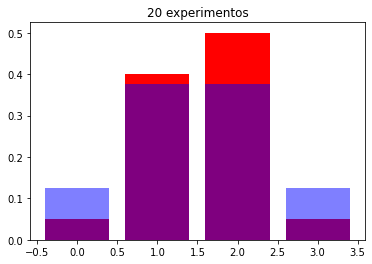

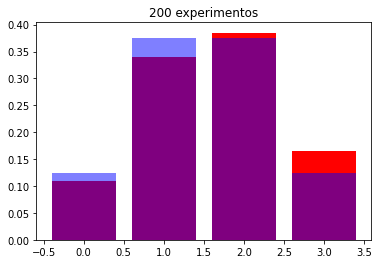

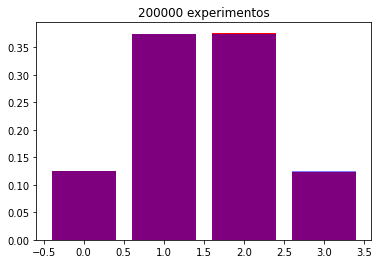

In [14]:
plot_hist(20)
plot_hist(200)
plot_hist(200000)